## Reading the Data

In [47]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Display the first few rows
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [33]:
data['headline_length'] = data['headline'].astype(str).apply(len)

headline_stats = data['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


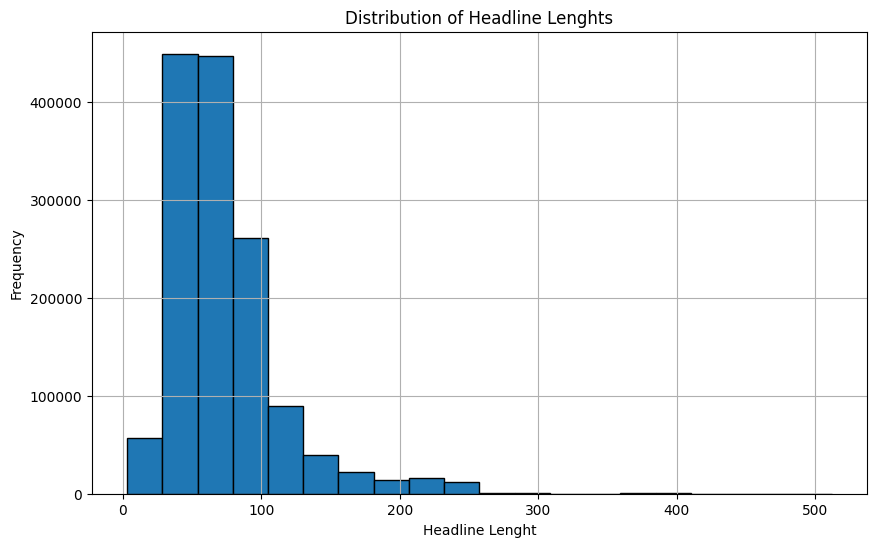

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['headline_length'].hist(bins=20, edgecolor= 'black')
plt.title('Distribution of Headline Lenghts')
plt.xlabel('Headline Lenght')
plt.ylabel('Frequency')
plt.show()

## Publisher Analysis

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


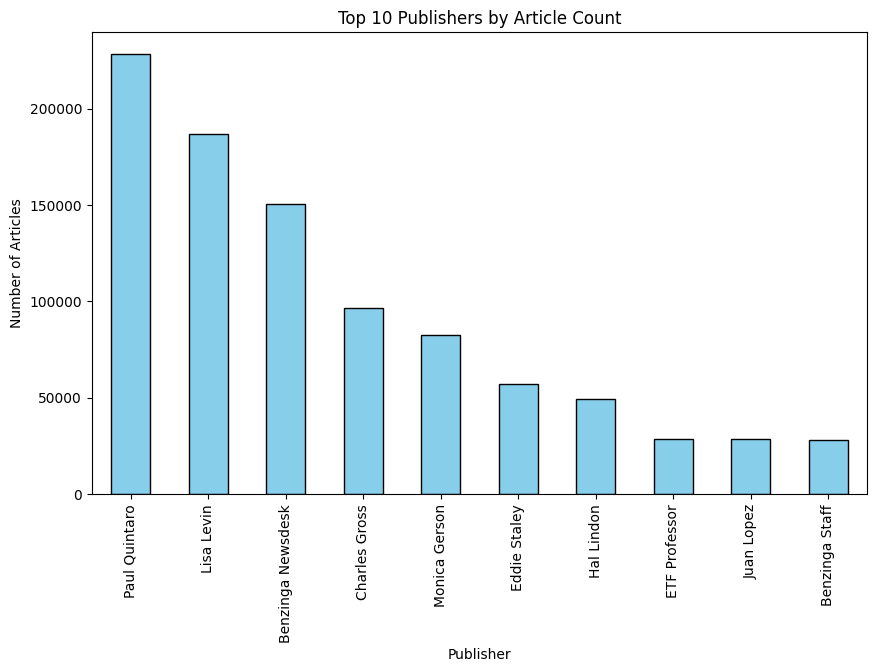

In [49]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display the top publishers
print(publisher_counts.head(10))

# Bar plot for the top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [104]:
import pandas as pd
import re

def analyze_email_domains(data):
    # Identify publishers that look like email addresses
    email_publishers = data[data['publisher'].str.contains('@', na=False)]
    
    # Extract domain names from email addresses
    email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: re.findall(r'@([\w\.-]+)', x)[0])
    
    # Count the number of articles per domain
    domain_counts = email_publishers['domain'].value_counts()
    
    # Display the top 10 domains
    print("Top 10 Domains by Number of Articles (from email addresses):")
    print(domain_counts.head(10))
    
    return domain_counts

# Example usage
if __name__ == "__main__":
    # Load the data
    data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

    # Analyze email domains
    domain_counts = analyze_email_domains(data)

Top 10 Domains by Number of Articles (from email addresses):
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6052\7832438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: re.findall(r'@([\w\.-]+)', x)[0])


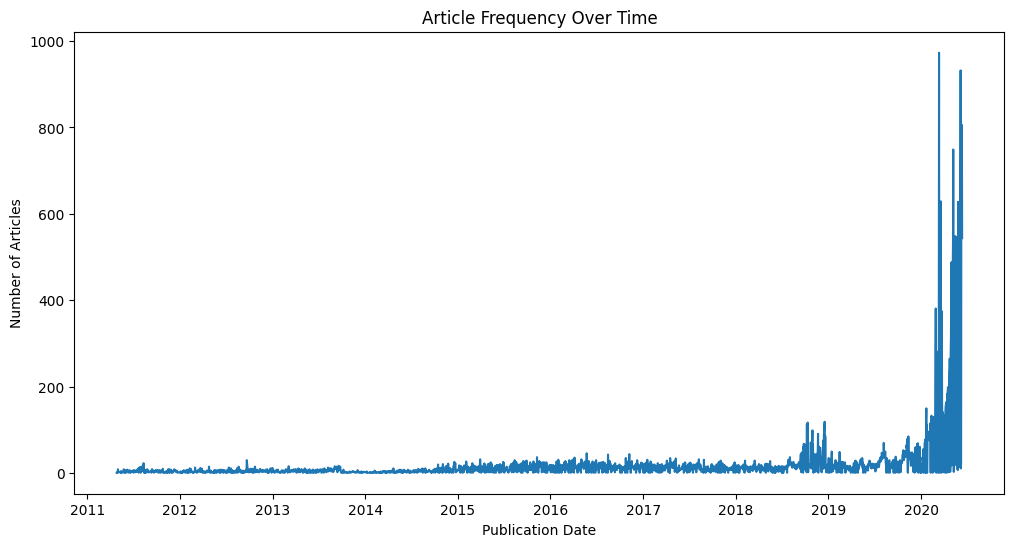

In [105]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Analyze the frequency of articles over time
date_counts = data['date'].dt.date.value_counts().sort_index()

# Plot the trend over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
from textblob import TextBlob

# Apply sentiment analysis on the 'headline' column using TextBlob
data['polarity'] = data['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize the sentiment into positive, negative, or neutral based on polarity
data['sentiment_label'] = data['polarity'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)

print("Sentiment analysis complete. Here are some samples:")
print(data[['headline', 'polarity', 'sentiment_label']].head())

Sentiment analysis complete. Here are some samples:
                                            headline  polarity sentiment_label
0            Stocks That Hit 52-Week Highs On Friday       0.0         neutral
1         Stocks That Hit 52-Week Highs On Wednesday       0.0         neutral
2                      71 Biggest Movers From Friday       0.0         neutral
3       46 Stocks Moving In Friday's Mid-Day Session       0.0         neutral
4  B of A Securities Maintains Neutral on Agilent...       0.0         neutral


## Sentiment Distribution by Publisher

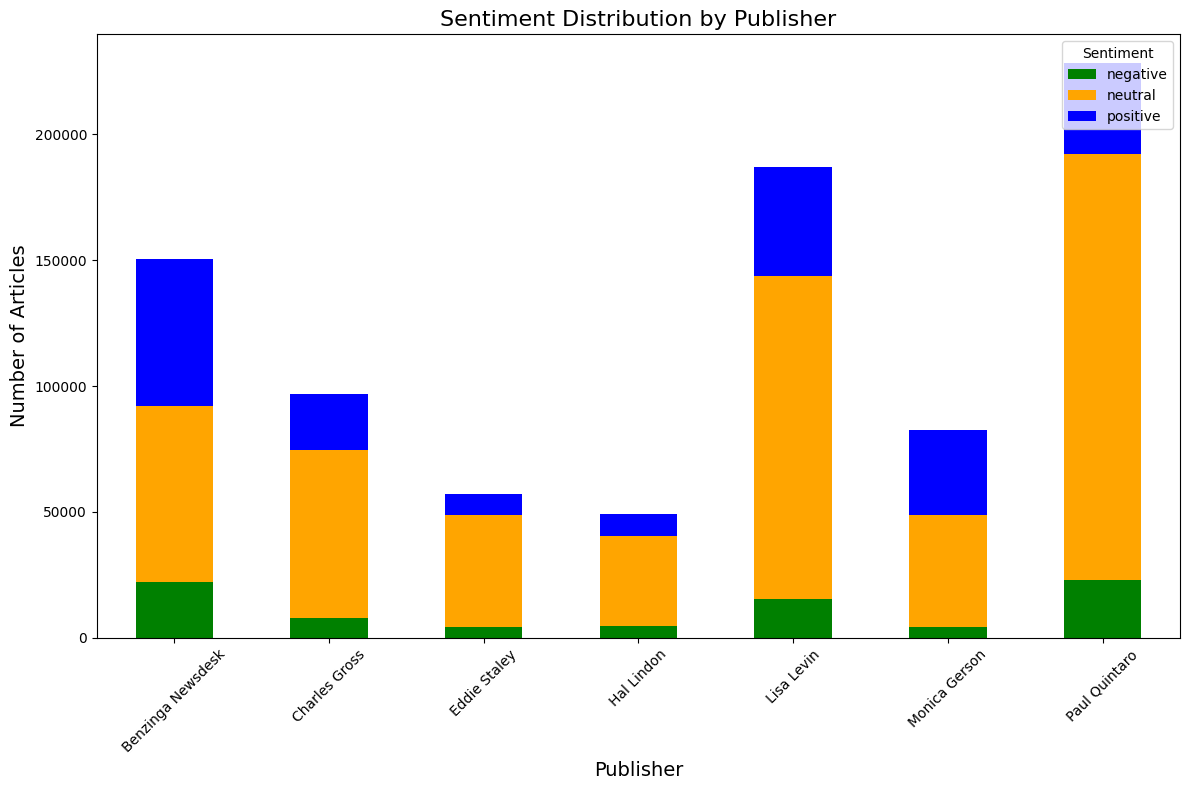

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

n = 7

top_publishers = data['publisher'].value_counts().head(n).index
filtered_df = data[data['publisher'].isin(top_publishers)]
    
    # Group by publisher and sentiment label, then count
sentiment_by_publisher = filtered_df.groupby(['publisher', 'sentiment_label']).size().unstack(fill_value=0)
    
    # Plot the sentiment distribution by publisher
sentiment_by_publisher.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'orange', 'blue'])
plt.title('Sentiment Distribution by Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Function to perform topic modeling
def perform_topic_modeling(df, num_topics=5, num_words=10, sample_size=None):
    # Subsample the data if a sample size is provided
    if sample_size:
        df = df.sample(n=sample_size, random_state=42)
    
    # Initialize CountVectorizer for text preprocessing
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(df['headline'])  # Apply only to the 'headline' column
    vocab = vectorizer.get_feature_names_out()

    # Fit LDA model
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(dtm)
    
    # Extract topics
    print("\nTopics discovered:")
    for idx, topic in enumerate(lda_model.components_):
        topic_words = [vocab[i] for i in topic.argsort()[-num_words:]]
        print(f"Topic #{idx + 1}: {', '.join(topic_words)}")
    
    return lda_model, dtm, vocab

# Example usage with topic modeling
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Perform topic modeling
lda_model, dtm, vocab = perform_topic_modeling(data, num_topics=5, num_words=10, sample_size=1000)



Topics discovered:
Topic #1: downgrades, yesterday, high, set, 52, stocks, week, new, benzinga, upgrades
Topic #2: deal, company, announces, offering, year, earnings, mid, says, update, shares
Topic #3: scheduled, day, morning, pre, earnings, mid, moving, session, stocks, market
Topic #4: lows, hold, initiates, hit, shares, higher, 52, week, trading, stocks
Topic #5: pt, target, price, raises, maintains, sales, reports, eps, est, vs
